In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load CSV file (adjust path if needed)
df = pd.read_csv("mayors_core.csv")

# take a look
df.head()

,person,personLabel,birthDate,genderLabel,partyLabel,start,end,positionLabel,cityLabel
0,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18T00:00:00Z,male,Republican Party of Minnesota,1876-04-11T00:00:00Z,1877-04-10T00:00:00Z,Mayor of Minneapolis,Minneapolis
1,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18T00:00:00Z,male,Republican Party of Minnesota,1882-04-11T00:00:00Z,1884-04-08T00:00:00Z,Mayor of Minneapolis,Minneapolis
2,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18T00:00:00Z,male,Republican Party of Minnesota,1886-04-13T00:00:00Z,1889-01-07T00:00:00Z,Mayor of Minneapolis,Minneapolis
3,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18T00:00:00Z,male,Republican Party of Minnesota,1901-01-07T00:00:00Z,1902-08-27T00:00:00Z,Mayor of Minneapolis,Minneapolis
4,http://www.wikidata.org/entity/Q4668117,Abner C. Brownell,1813-01-01T00:00:00Z,male,Democratic Party,1852-01-01T00:00:00Z,1854-12-31T00:00:00Z,mayor of Cleveland,Cleveland


In [14]:
# Inspect structure
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Summary Statistics ---")
print(df.describe(include="all"))

# Convert date columns to datetime
for col in ["birthDate", "start", "end"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Create extra columns
df["start_year"] = df["start"].dt.year
df["end_year"] = df["end"].dt.year
df["birth_year"] = df["birthDate"].dt.year

# Age at start of mayorship
df["age_at_start"] = df["start_year"] - df["birth_year"]

print("\n--- Basic Properties ---")
print("Number of rows:", len(df))
print("Unique mayors:", df['personLabel'].nunique())
print("Cities covered:", df['cityLabel'].nunique())
print("Time range:", df['start_year'].min(), "-", df['end_year'].max())
print("Parties:", df['partyLabel'].nunique())
print("Genders:", df['genderLabel'].value_counts().to_dict())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   person         957 non-null    object
 1   personLabel    957 non-null    object
 2   birthDate      957 non-null    object
 3   genderLabel    957 non-null    object
 4   partyLabel     957 non-null    object
 5   start          957 non-null    object
 6   end            957 non-null    object
 7   positionLabel  957 non-null    object
 8   cityLabel      957 non-null    object
dtypes: object(9)
memory usage: 67.4+ KB
None

--- First 5 Rows ---
                                    person        personLabel  \
0  http://www.wikidata.org/entity/Q4647455         A. A. Ames   
1  http://www.wikidata.org/entity/Q4647455         A. A. Ames   
2  http://www.wikidata.org/entity/Q4647455         A. A. Ames   
3  http://www.wikidata.org/entity/Q4647455         A. A. Ames   
4  http:

## The conclusions:
1) We have full data coverage no null values anywhere
2) 838 unique mayors, 2 genders, 29 parties, 241 cities
3) 248 unique positions, maybe needs cleaning

In [5]:
# Now let's have a look again
df.head()

,person,personLabel,birthDate,genderLabel,partyLabel,start,end,positionLabel,cityLabel,start_year,end_year,birth_year,age_at_start
0,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1876-04-11 00:00:00+00:00,1877-04-10 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1876,1877,1842,34
1,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1882-04-11 00:00:00+00:00,1884-04-08 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1882,1884,1842,40
2,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1886-04-13 00:00:00+00:00,1889-01-07 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1886,1889,1842,44
3,http://www.wikidata.org/entity/Q4647455,A. A. Ames,1842-01-18 00:00:00+00:00,male,Republican Party of Minnesota,1901-01-07 00:00:00+00:00,1902-08-27 00:00:00+00:00,Mayor of Minneapolis,Minneapolis,1901,1902,1842,59
4,http://www.wikidata.org/entity/Q4668117,Abner C. Brownell,1813-01-01 00:00:00+00:00,male,Democratic Party,1852-01-01 00:00:00+00:00,1854-12-31 00:00:00+00:00,mayor of Cleveland,Cleveland,1852,1854,1813,39


In [9]:
# Now I want to see how many instances of each party there are 
party_counts = df['partyLabel'].value_counts()
print(party_counts)

partyLabel
Democratic Party                           581
Republican Party                           303
independent politician                      13
Whig Party                                  12
Minnesota Democratic–Farmer–Labor Party      8
Republican Party of Minnesota                5
People's Party                               3
California Democratic Party                  3
Know Nothing Party                           3
Vermont Progressive Party                    3
Progressive Party                            2
Liberal Party                                2
Socialist Party of America                   2
Democratic Party of Wisconsin                2
Democratic Socialists of America             1
Socialist Party of Washington                1
Libertarian Party                            1
Best Party of Hawaii                         1
California Republican Party                  1
Constitutional Union Party                   1
Liberty Union Party                          1
Fu

In [28]:
df["age_at_start"].max()

77

In [15]:
# Since we see that the distrbution of parties maynly consit of 2 leders "Democratic" and "Republiucan"
# We will group all the other parties in 1 and call it "Other Parties"

# Group parties
df['party_grouped'] = df['partyLabel'].apply(
    lambda x: x if x in ["Democratic Party", "Republican Party"] else "Other Parties"
)

# Count grouped parties
party_grouped_counts = df['party_grouped'].value_counts()

print(party_grouped_counts)

party_grouped
Democratic Party    581
Republican Party    303
Other Parties        73
Name: count, dtype: int64


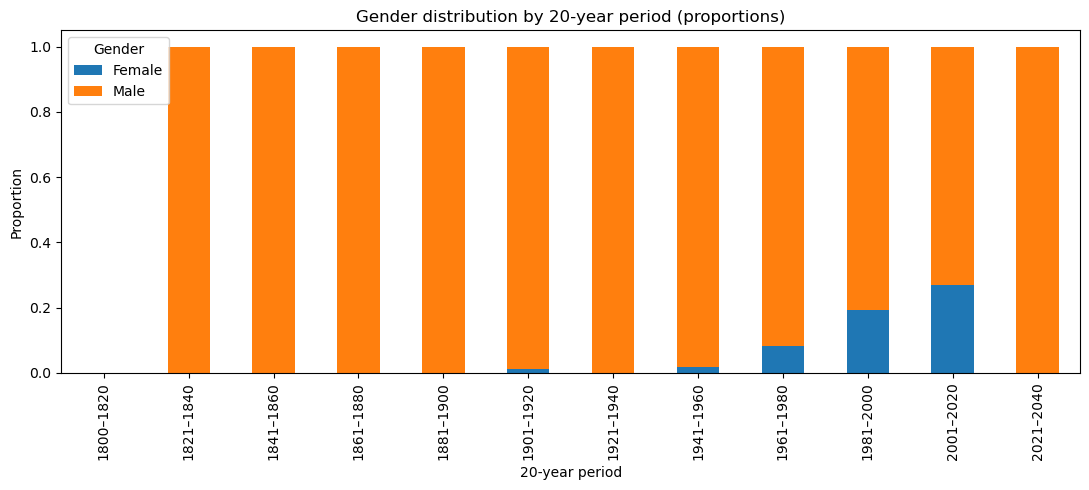

In [16]:
# --- Define EDITABLE 20-year periods (inclusive bounds) ---
# You can freely change/add/remove lines below to customize periods.
PERIODS = [
    (1800, 1820, "1800–1820"),
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

# Helper: map year to period label
def assign_period(year: float) -> str:
    if pd.isna(year):
        return np.nan
    y = int(year)
    for a, b, label in PERIODS:
        if a <= y <= b:
            return label
    return "Outside periods"

df["period20"] = df["start_year"].apply(assign_period)

# Filter to rows that fall into our defined periods
df_period = df[df["period20"].isin([p[2] for p in PERIODS])].copy()

# Normalize gender labels (optional; feel free to adjust)
df_period["gender_norm"] = df_period["genderLabel"].str.strip().str.title()

# --- Counts by Gender x Period ---
counts = (
    df_period.groupby(["period20", "gender_norm"])
    .size()
    .rename("count")
    .reset_index()
)

# Pivot for a table (rows=periods, cols=gender)
counts_pivot = counts.pivot(index="period20", columns="gender_norm", values="count").fillna(0).astype(int)

# Ensure all periods appear even if zero
all_period_labels = [p[2] for p in PERIODS]
counts_pivot = counts_pivot.reindex(all_period_labels, fill_value=0)

# --- Proportions within each period ---
period_totals = counts_pivot.sum(axis=1).replace(0, np.nan)
proportions_pivot = counts_pivot.div(period_totals, axis=0)

# --- Plot: stacked bar of proportions ---
ax = (proportions_pivot).plot(
    kind="bar",
    stacked=True,
    figsize=(11, 5),
    title="Gender distribution by 20-year period (proportions)"
)
ax.set_xlabel("20-year period")
ax.set_ylabel("Proportion")
ax.legend(title="Gender")
plt.tight_layout()
plt.show()

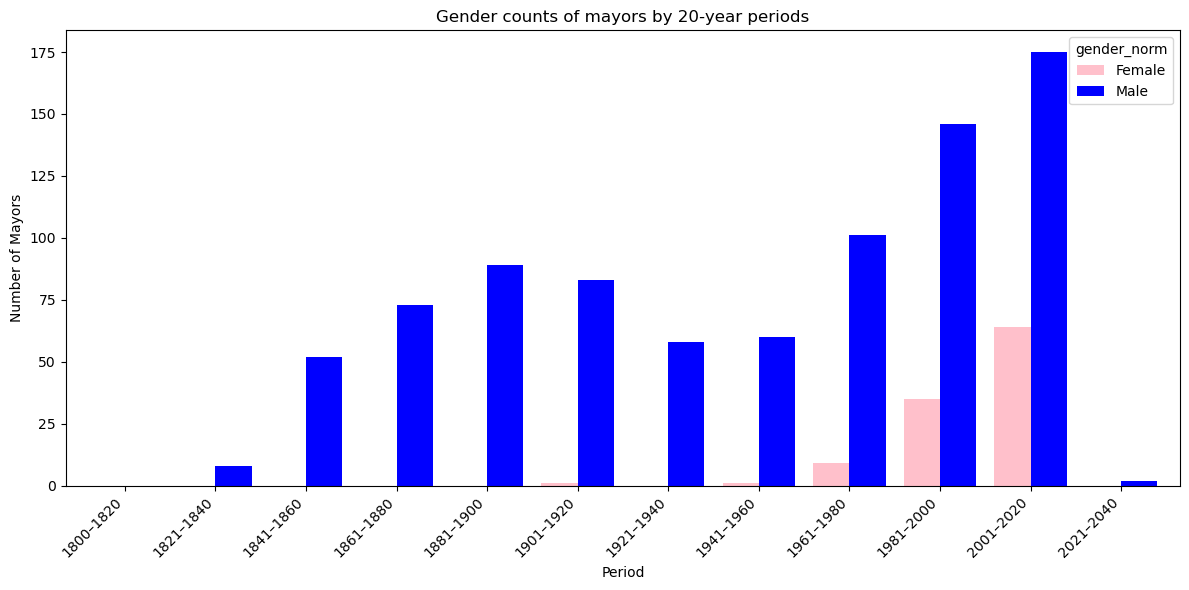

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Define your periods ---
PERIODS = [
    (1800, 1820, "1800–1820"),
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

# Assign period based on start_year
def assign_period(year: float) -> str:
    if pd.isna(year):
        return np.nan
    for a, b, label in PERIODS:
        if a <= year <= b:
            return label
    return "Outside periods"

df["period20"] = df["start_year"].apply(assign_period)

# Normalize gender
df["gender_norm"] = df["genderLabel"].str.strip().str.title()

# Count by period and gender
counts = df.groupby(["period20", "gender_norm"]).size().reset_index(name="count")

# Pivot for plotting
counts_pivot = counts.pivot(index="period20", columns="gender_norm", values="count").fillna(0)

# Reorder rows by PERIODS
period_labels = [p[2] for p in PERIODS]
counts_pivot = counts_pivot.reindex(period_labels).fillna(0)

# Plot
ax = counts_pivot.plot(
    kind="bar",
    figsize=(12,6),
    color={"Male": "blue", "Female": "pink"},
    width=0.8
)
ax.set_title("Gender counts of mayors by 20-year periods")
ax.set_xlabel("Period")
ax.set_ylabel("Number of Mayors")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Gender counts by period:


gender_norm,period20,Female,Male
0,1800–1820,0,0
1,1821–1840,0,8
2,1841–1860,0,52
3,1861–1880,0,73
4,1881–1900,0,89
5,1901–1920,1,83
6,1921–1940,0,58
7,1941–1960,1,60
8,1961–1980,9,101
9,1981–2000,35,146


Gender proportions by period:


gender_norm,period20,Female,Male
0,1800–1820,NaN,NaN
1,1821–1840,0.000000,1.000000
2,1841–1860,0.000000,1.000000
3,1861–1880,0.000000,1.000000
4,1881–1900,0.000000,1.000000
5,1901–1920,0.011905,0.988095
6,1921–1940,0.000000,1.000000
7,1941–1960,0.016393,0.983607
8,1961–1980,0.081818,0.918182
9,1981–2000,0.193370,0.806630


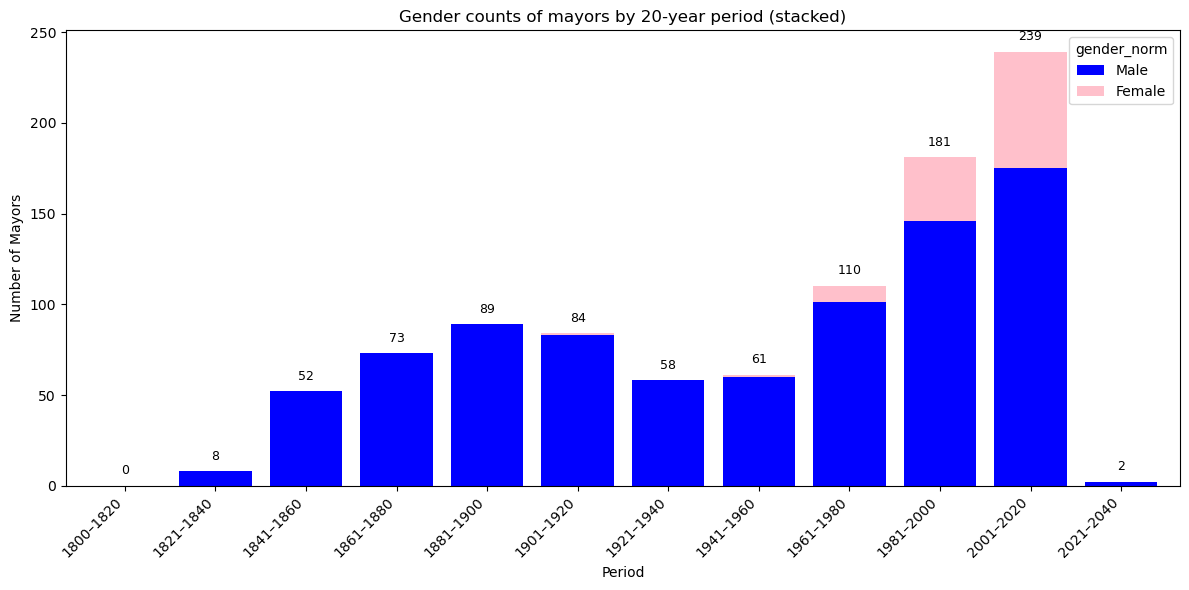

In [18]:
# --- EDITABLE 20-year periods (inclusive bounds) ---
PERIODS = [
    (1800, 1820, "1800–1820"),
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

def assign_period(year):
    if pd.isna(year):
        return np.nan
    y = int(year)
    for a, b, label in PERIODS:
        if a <= y <= b:
            return label
    return "Outside periods"

df["period20"] = df["start_year"].apply(assign_period)
period_labels = [p[2] for p in PERIODS]

# Normalize gender
df["gender_norm"] = df["genderLabel"].astype(str).str.strip().str.title()

# Counts: Period x Gender
gender_counts = (
    df[df["period20"].isin(period_labels)]
    .groupby(["period20", "gender_norm"])
    .size()
    .rename("count")
    .reset_index()
)

# Pivot to columns Male/Female
gender_pivot = gender_counts.pivot(index="period20", columns="gender_norm", values="count").fillna(0)
for col in ["Male", "Female"]:
    if col not in gender_pivot.columns:
        gender_pivot[col] = 0
gender_pivot = gender_pivot.reindex(period_labels).fillna(0).astype(int)

# Proportions per period
gender_prop = gender_pivot.div(gender_pivot.sum(axis=1).replace(0, np.nan), axis=0)

# Show tables
print("Gender counts by period:")
display(gender_pivot.reset_index())
print("Gender proportions by period:")
display(gender_prop.reset_index())

# Plot stacked bar: Female (pink) on top of Male (blue)
ax = gender_pivot[["Male", "Female"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color={"Male": "blue", "Female": "pink"},
    width=0.8,
    title="Gender counts of mayors by 20-year period (stacked)"
)
ax.set_xlabel("Period")
ax.set_ylabel("Number of Mayors")
plt.xticks(rotation=45, ha="right")

# Annotate totals on top of each bar
totals = gender_pivot.sum(axis=1).values
ymax = max(totals) if len(totals) else 0
for i, total in enumerate(totals):
    ax.text(i, total + (0.02 * ymax if ymax > 0 else 0.5), int(total), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Party counts by period (Dem/Rep/Other):


party_grouped,period20,Democratic Party,Other Parties,Republican Party
0,1800–1820,0,0,0
1,1821–1840,4,3,1
2,1841–1860,25,13,14
3,1861–1880,35,4,34
4,1881–1900,43,11,35
5,1901–1920,41,7,36
6,1921–1940,27,1,30
7,1941–1960,40,2,19
8,1961–1980,73,2,35
9,1981–2000,118,12,51


Party proportions by period (Dem/Rep/Other):


party_grouped,period20,Democratic Party,Other Parties,Republican Party
0,1800–1820,NaN,NaN,NaN
1,1821–1840,0.500000,0.375000,0.125000
2,1841–1860,0.480769,0.250000,0.269231
3,1861–1880,0.479452,0.054795,0.465753
4,1881–1900,0.483146,0.123596,0.393258
5,1901–1920,0.488095,0.083333,0.428571
6,1921–1940,0.465517,0.017241,0.517241
7,1941–1960,0.655738,0.032787,0.311475
8,1961–1980,0.663636,0.018182,0.318182
9,1981–2000,0.651934,0.066298,0.281768


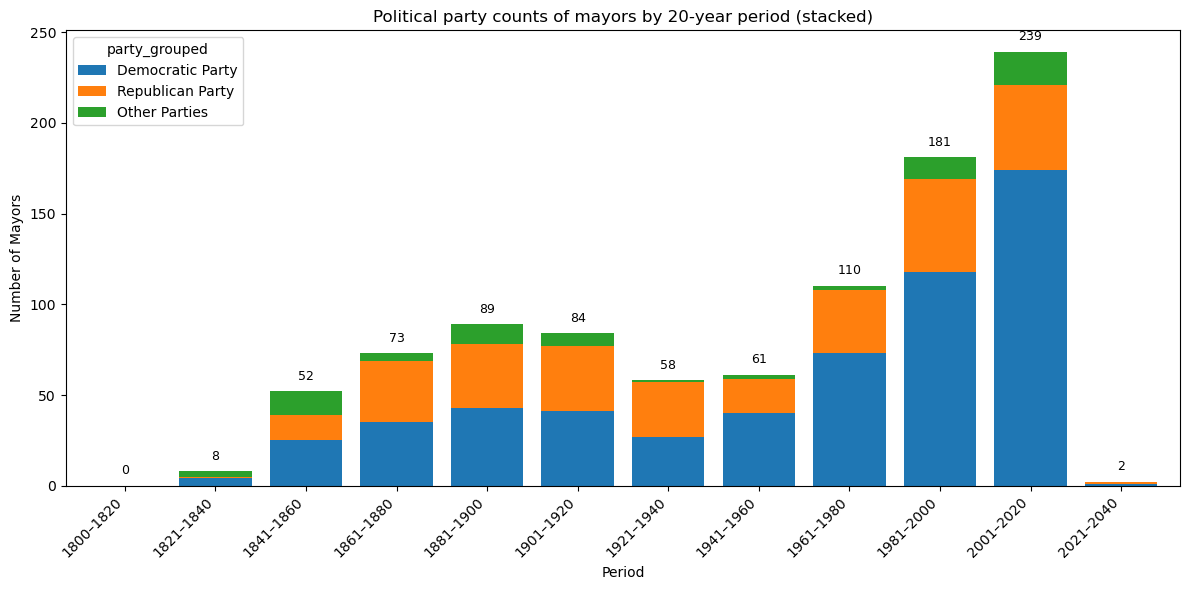

In [19]:
# --- EDITABLE 20-year periods (inclusive bounds) ---
PERIODS = [
    (1800, 1820, "1800–1820"),
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

def assign_period(year):
    if pd.isna(year):
        return np.nan
    y = int(year)
    for a, b, label in PERIODS:
        if a <= y <= b:
            return label
    return "Outside periods"

df["period20"] = df["start_year"].apply(assign_period)
period_labels = [p[2] for p in PERIODS]

# Group parties: everything except Dem/Rep -> Other Parties
major = {"Democratic Party", "Republican Party"}
df["party_grouped"] = df["partyLabel"].apply(lambda p: p if p in major else "Other Parties")

# Counts: Period x PartyGrouped
party_counts = (
    df[df["period20"].isin(period_labels)]
    .groupby(["period20", "party_grouped"])
    .size()
    .rename("count")
    .reset_index()
)

party_pivot = party_counts.pivot(index="period20", columns="party_grouped", values="count").fillna(0)
for col in ["Democratic Party", "Republican Party", "Other Parties"]:
    if col not in party_pivot.columns:
        party_pivot[col] = 0
party_pivot = party_pivot.reindex(period_labels).fillna(0).astype(int)

# Proportions per period
party_prop = party_pivot.div(party_pivot.sum(axis=1).replace(0, np.nan), axis=0)

# Show tables
print("Party counts by period (Dem/Rep/Other):")
display(party_pivot.reset_index())
print("Party proportions by period (Dem/Rep/Other):")
display(party_prop.reset_index())

# Plot stacked bar (colors not fixed; matplotlib defaults)
ax = party_pivot[["Democratic Party", "Republican Party", "Other Parties"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    title="Political party counts of mayors by 20-year period (stacked)"
)
ax.set_xlabel("Period")
ax.set_ylabel("Number of Mayors")
plt.xticks(rotation=45, ha="right")

# Annotate totals on top of each bar
totals = party_pivot.sum(axis=1).values
ymax = max(totals) if len(totals) else 0
for i, total in enumerate(totals):
    ax.text(i, total + (0.02 * ymax if ymax > 0 else 0.5), int(total), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Age-group counts by 20-year period:


age_group,period20,20–29,30–39,40–49,50–59,60–69,70–79,80–89
0,1800–1820,0,0,0,0,0,0,0
1,1821–1840,1,7,0,0,0,0,0
2,1841–1860,3,21,27,1,0,0,0
3,1861–1880,5,16,27,19,6,0,0
4,1881–1900,13,20,26,21,9,0,0
5,1901–1920,9,14,35,23,2,1,0
6,1921–1940,1,9,15,24,8,1,0
7,1941–1960,0,19,19,18,3,2,0
8,1961–1980,4,36,33,33,3,1,0
9,1981–2000,3,53,69,35,18,3,0


Age-group proportions by 20-year period:


age_group,period20,20–29,30–39,40–49,50–59,60–69,70–79,80–89
0,1800–1820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1821–1840,0.125000,0.875000,0.000000,0.000000,0.000000,0.000000,0.0
2,1841–1860,0.057692,0.403846,0.519231,0.019231,0.000000,0.000000,0.0
3,1861–1880,0.068493,0.219178,0.369863,0.260274,0.082192,0.000000,0.0
4,1881–1900,0.146067,0.224719,0.292135,0.235955,0.101124,0.000000,0.0
5,1901–1920,0.107143,0.166667,0.416667,0.273810,0.023810,0.011905,0.0
6,1921–1940,0.017241,0.155172,0.258621,0.413793,0.137931,0.017241,0.0
7,1941–1960,0.000000,0.311475,0.311475,0.295082,0.049180,0.032787,0.0
8,1961–1980,0.036364,0.327273,0.300000,0.300000,0.027273,0.009091,0.0
9,1981–2000,0.016575,0.292818,0.381215,0.193370,0.099448,0.016575,0.0


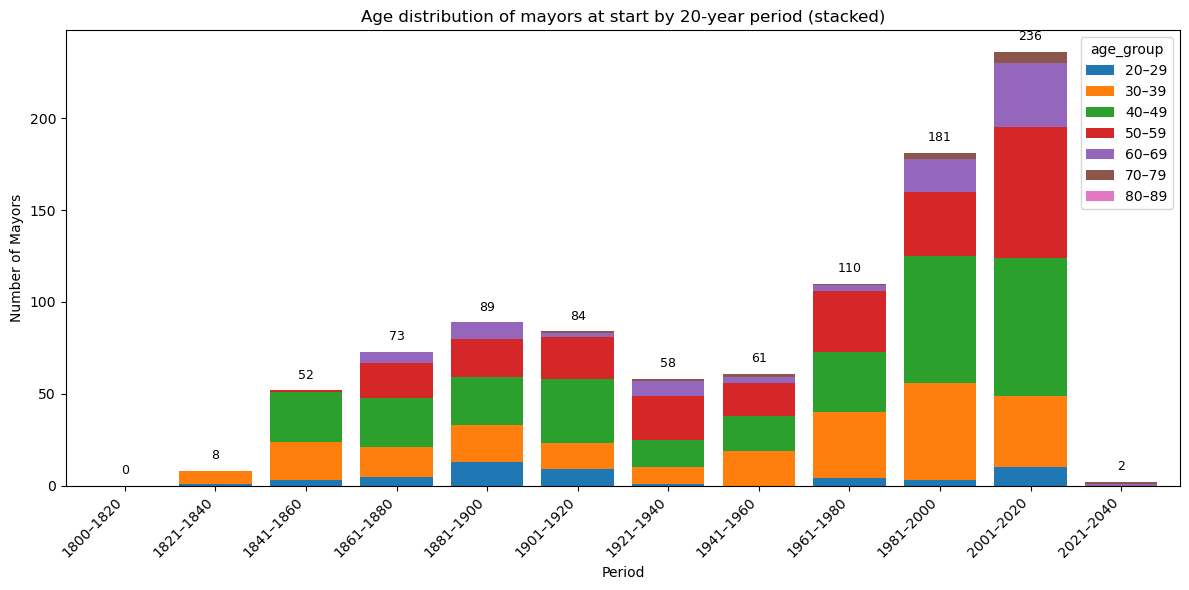

In [25]:
# --- EDITABLE 20-year periods (inclusive bounds) ---
PERIODS = [
    (1800, 1820, "1800–1820"),
    (1821, 1840, "1821–1840"),
    (1841, 1860, "1841–1860"),
    (1861, 1880, "1861–1880"),
    (1881, 1900, "1881–1900"),
    (1901, 1920, "1901–1920"),
    (1921, 1940, "1921–1940"),
    (1941, 1960, "1941–1960"),
    (1961, 1980, "1961–1980"),
    (1981, 2000, "1981–2000"),
    (2001, 2020, "2001–2020"),
    (2021, 2040, "2021–2040"),
]

def assign_period(year):
    if pd.isna(year):
        return np.nan
    y = int(year)
    for a, b, label in PERIODS:
        if a <= y <= b:
            return label
    return "Outside periods"

df["period20"] = df["start_year"].apply(assign_period)
period_labels = [p[2] for p in PERIODS]

# --- Define age bins (10-year groups) ---
age_bins = list(range(20, 100, 10))  # 20-30, 31-40, ..., 80+
age_labels = [f"{age_bins[i]}–{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
df["age_group"] = pd.cut(df["age_at_start"], bins=age_bins, labels=age_labels, right=True)

# Counts: Period x AgeGroup
age_counts = (
    df[df["period20"].isin(period_labels) & df["age_group"].notna()]
    .groupby(["period20", "age_group"])
    .size()
    .rename("count")
    .reset_index()
)

# Pivot for stacked bar
age_pivot = age_counts.pivot(index="period20", columns="age_group", values="count").fillna(0)
age_pivot = age_pivot.reindex(period_labels).fillna(0).astype(int)

# Proportions per period
age_prop = age_pivot.div(age_pivot.sum(axis=1).replace(0, np.nan), axis=0)

# Show tables
print("Age-group counts by 20-year period:")
display(age_pivot.reset_index())
print("Age-group proportions by 20-year period:")
display(age_prop.reset_index())

# Plot stacked bar
ax = age_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    title="Age distribution of mayors at start by 20-year period (stacked)"
)
ax.set_xlabel("Period")
ax.set_ylabel("Number of Mayors")
plt.xticks(rotation=45, ha="right")

# Annotate totals on top of each bar
totals = age_pivot.sum(axis=1).values
ymax = max(totals) if len(totals) else 0
for i, total in enumerate(totals):
    ax.text(i, total + (0.02 * ymax if ymax > 0 else 0.5), int(total), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()